In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, f_classif, SelectKBest

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('image_bins_stats_lungs4.csv')
data.shape

(3837, 106)

In [3]:
data.head()

,filename,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,transformed_image_covid_1.png,4722,15567,4,7683,12061,1,8864,16634,77.433079,...,29.26670025,39.092067,21.915792,15.564234,10.232452,12.530200,0.000000,40.674295,31.538221,0
1,transformed_image_covid_2.png,6556,13701,25,9956,9437,0,12114,13747,79.728951,...,33.53821958,28.281468,23.127681,11.979449,17.519198,24.313131,0.000000,38.506228,36.562100,0
2,transformed_image_covid_3.png,10512,12249,1,11502,7743,2,9619,13908,68.987348,...,25.22521593,26.681675,24.442798,0.000000,12.323460,38.083555,4.204482,55.658016,27.952446,0
3,transformed_image_covid_4.png,7987,11854,2,10419,11895,9,11931,11439,94.638788,...,34.51618537,24.056261,28.558353,0.840896,13.800903,27.757483,33.449086,44.809595,37.884099,0
4,transformed_image_covid_5.png,7761,14159,4,10898,10560,9,9153,12992,68.762015,...,32.13721328,27.884767,23.329477,13.445587,16.742312,28.738945,26.135224,49.330295,35.162254,0


In [4]:
data = data.drop(['filename'], axis=1)
data.head()

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,rmean_bins1,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,4722,15567,4,7683,12061,1,8864,16634,77.433079,0.202929,...,29.26670025,39.092067,21.915792,15.564234,10.232452,12.530200,0.000000,40.674295,31.538221,0
1,6556,13701,25,9956,9437,0,12114,13747,79.728951,5.447851,...,33.53821958,28.281468,23.127681,11.979449,17.519198,24.313131,0.000000,38.506228,36.562100,0
2,10512,12249,1,11502,7743,2,9619,13908,68.987348,36.388358,...,25.22521593,26.681675,24.442798,0.000000,12.323460,38.083555,4.204482,55.658016,27.952446,0
3,7987,11854,2,10419,11895,9,11931,11439,94.638788,15.529948,...,34.51618537,24.056261,28.558353,0.840896,13.800903,27.757483,33.449086,44.809595,37.884099,0
4,7761,14159,4,10898,10560,9,9153,12992,68.762015,4.809379,...,32.13721328,27.884767,23.329477,13.445587,16.742312,28.738945,26.135224,49.330295,35.162254,0


In [5]:
name = ['rstd_bins0','rstd_bins1','rstd_bins2','rstd_bins3','rstd_bins4','rstd_bins5','rstd_bins6','rstd_bins7','rskew_bins0','rskew_bins1','rskew_bins2','rskew_bins3','rskew_bins4','rskew_bins5','rskew_bins6','rskew_bins7','gstd_bins0','gstd_bins1','gstd_bins2','gstd_bins3','gstd_bins4','gstd_bins5','gstd_bins6','gstd_bins7','bstd_bins0','bstd_bins1','bstd_bins2','bstd_bins3','bstd_bins4','bstd_bins5','bstd_bins6','bstd_bins7','gskew_bins0','gskew_bins1','gskew_bins2','gskew_bins3','gskew_bins4','gskew_bins5','gskew_bins6','gskew_bins7','bskew_bins0','bskew_bins1','bskew_bins2','bskew_bins3','bskew_bins4','bskew_bins5','bskew_bins6','bskew_bins7','class']
for i in name:
    data[i] = pd.to_numeric(data[i],errors='coerce')

In [6]:
import numpy as np
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(data)

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,rmean_bins1,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,4722.0,15567.0,4.0,7683.0,12061.0,1.0,8864.0,16634.0,77.433079,0.202929,...,29.266700,39.092067,21.915792,15.564234,10.232452,12.530200,0.000000,40.674295,31.538221,0.0
1,6556.0,13701.0,25.0,9956.0,9437.0,0.0,12114.0,13747.0,79.728951,5.447851,...,33.538220,28.281468,23.127681,11.979449,17.519198,24.313131,0.000000,38.506228,36.562100,0.0
2,10512.0,12249.0,1.0,11502.0,7743.0,2.0,9619.0,13908.0,68.987348,36.388358,...,25.225216,26.681675,24.442798,0.000000,12.323460,38.083555,4.204482,55.658016,27.952446,0.0
3,7987.0,11854.0,2.0,10419.0,11895.0,9.0,11931.0,11439.0,94.638788,15.529948,...,34.516185,24.056261,28.558353,0.840896,13.800903,27.757483,33.449086,44.809595,37.884099,0.0
4,7761.0,14159.0,4.0,10898.0,10560.0,9.0,9153.0,12992.0,68.762015,4.809379,...,32.137213,27.884767,23.329477,13.445587,16.742312,28.738945,26.135224,49.330295,35.162254,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,9870.0,10436.0,13.0,9558.0,9764.0,0.0,16080.0,9815.0,104.708207,27.440974,...,28.826381,16.609479,32.541509,10.841782,18.263777,29.591836,0.000000,43.584547,43.219779,2.0
3833,5946.0,14026.0,1.0,11041.0,12415.0,0.0,7886.0,14221.0,74.044736,1.607016,...,39.246127,30.936390,21.337923,0.000000,9.706518,17.877323,0.000000,45.339391,32.611797,2.0
3834,7330.0,8408.0,6.0,10811.0,18521.0,2.0,6699.0,13759.0,112.515416,7.136774,...,28.790502,42.515393,18.625921,11.891740,14.170267,3.991819,0.000000,36.311970,41.914116,2.0
3835,7630.0,16431.0,1.0,9530.0,3413.0,3.0,17843.0,10685.0,73.122412,24.310145,...,37.426827,20.622111,29.148814,0.000000,20.197666,31.678731,4.769168,50.967873,38.781249,2.0


In [7]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['class'], axis=1),
    data['class'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((2676, 104), (1147, 104))

In [8]:
# calculate the univariate statistical measure between
# each of the variables and the target

# similarly to chi2, the output is one array with f-scores
# and one array with the pvalues

univariate = f_classif(X_train, y_train)

univariate

(array([186.34326519,  12.07242871,  34.35329927,   2.81636429,
        220.16959356,  21.61454467,   2.47558785,  26.27319559,
         20.46050509,  90.4284612 ,  70.27133912,  26.65975928,
        164.98822716, 202.58865198,  14.95358979,  57.4033063 ,
         45.46932438,  19.26901086, 141.01037563,  29.80422911,
         32.44141033, 164.55750848, 336.95581743,   6.94339774,
         66.2093384 ,  18.74490433, 147.72031672,  28.27716946,
         25.47127335, 168.36530777, 375.66604275,  21.27653421,
         96.27316889,  24.73665886, 148.54689954,  25.73602148,
         24.12834009, 164.34874842, 280.22833241,  31.13187338,
        149.49473234,  77.8686534 ,  94.15159881, 128.69931696,
        137.00010905,  33.66991556,   8.22626498,  49.02445474,
        300.01694552,  98.85512238, 123.88305069,  36.64704703,
         17.75641047, 111.70163834,  78.92925922,  80.41908187,
        241.77364431,  74.52506234, 126.42345324,  28.25439318,
         15.16128393, 111.94904447,  86.

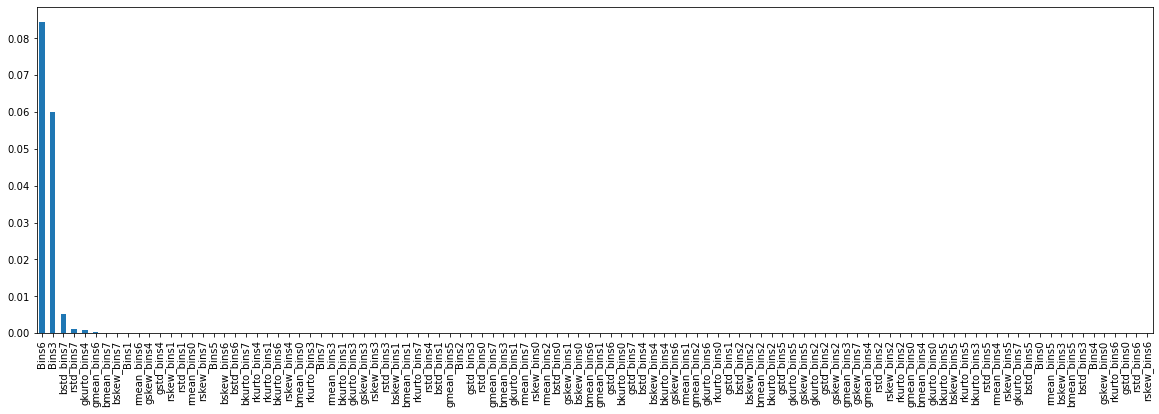

In [9]:
# 1) let's capture the pvalues in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their anova pvalues
# 4) and make a var plot

univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 6))

In [10]:
# select the top 10 features
sel_ = SelectKBest(f_classif, k=20).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel_.get_support()]

Index(['Bins0', 'Bins4', 'rmean_bins4', 'rmean_bins5', 'rstd_bins5',
       'rstd_bins6', 'rskew_bins5', 'rskew_bins6', 'rkurto_bins5',
       'rkurto_bins6', 'gstd_bins0', 'gskew_bins0', 'gkurto_bins7',
       'bmean_bins5', 'bstd_bins3', 'bstd_bins5', 'bskew_bins3', 'bskew_bins5',
       'bkurto_bins3', 'bkurto_bins5'],
      dtype='object')

In [11]:
# I keep a copy of the dataset with all the variables
# to compare the performance of machine learning models
# at the end of the notebook

X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [12]:
# find and remove correlated features
def correlation(dataset, threshold):
    
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # we are interested in absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    
    return col_corr


corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)))

correlated features:  36


In [13]:
# remove correlated features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((2676, 68), (1147, 68))

In [14]:
# keep a copy of the dataset at  this stage
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

In [15]:
sel_ = SelectKBest(f_classif, k=20).fit(X_train, y_train)

# capture selected feature names
features_to_keep = X_train.columns[sel_.get_support()]

# select features
X_train_anova = sel_.transform(X_train)
X_test_anova = sel_.transform(X_test)

# numpy array to dataframe
X_train_anova = pd.DataFrame(X_train_anova)
X_train_anova.columns = features_to_keep

X_test_anova = pd.DataFrame(X_test_anova)
X_test_anova.columns = features_to_keep

X_train_anova.shape, X_test_anova.shape

((2676, 20), (1147, 20))

In [16]:
# create a function to build random forests and
# compare its performance in train and test sets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import scikitplot as skplt
import matplotlib.pyplot as plt

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    
#     print('Train set')
#     pred = rf.predict_proba(X_train)
#     print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1], multi_class='ovo')))
    
#     print('Test set')
#     pred = rf.predict_proba(X_test)
#     print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1], multi_class='ovo')))
    y_pred = rf.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred, average='micro')))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred, average='micro')))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred, average='micro')))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [17]:
run_randomForests(X_train_original,
                  X_test_original,
                  y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.79      0.81       364
         1.0       0.71      0.81      0.76       378
         2.0       0.71      0.66      0.68       405

    accuracy                           0.75      1147
   macro avg       0.75      0.75      0.75      1147
weighted avg       0.75      0.75      0.75      1147

Confusion Matrix:
[[286  29  49]
 [ 10 306  62]
 [ 42  96 267]]
Metrics:
Accuracy: 0.749
F1 Score: 0.749
Precision: 0.749
Recall: 0.749
After Cross Validation:
Accuracy: 73.02 %
Standard Deviation: 1.69 %


In [18]:
# filter methods - univariate roc-auc
run_randomForests(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80       364
         1.0       0.73      0.77      0.75       378
         2.0       0.66      0.67      0.66       405

    accuracy                           0.73      1147
   macro avg       0.74      0.73      0.73      1147
weighted avg       0.73      0.73      0.73      1147

Confusion Matrix:
[[279  24  61]
 [  7 290  81]
 [ 51  84 270]]
Metrics:
Accuracy: 0.731
F1 Score: 0.731
Precision: 0.731
Recall: 0.731
After Cross Validation:
Accuracy: 71.52 %
Standard Deviation: 2.01 %


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def run_logistic(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(penalty='l1', random_state=44, max_iter=1000, solver='liblinear')
    logit.fit(X_train, y_train)
    
#     print('Train set')
#     pred = logit.predict_proba(scaler.transform(X_train))
#     print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
#     print('Test set')
#     pred = logit.predict_proba(scaler.transform(X_test))
#     print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = logit.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred, average='micro')))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred, average='micro')))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred, average='micro')))
    
#     print('After Cross Validation:')
#     accuracies = cross_val_score(estimator = logit, X = X_train, y = y_train, cv = 10)
#     print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
#     print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [21]:
run_logistic(X_train_original,
                  X_test_original,
                  y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       364
         1.0       0.80      0.88      0.83       378
         2.0       0.82      0.74      0.78       405

    accuracy                           0.84      1147
   macro avg       0.84      0.84      0.84      1147
weighted avg       0.84      0.84      0.84      1147

Confusion Matrix:
[[329  11  24]
 [  7 331  40]
 [ 31  73 301]]
Metrics:
Accuracy: 0.838
F1 Score: 0.838
Precision: 0.838
Recall: 0.838


In [22]:
run_logistic(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       364
         1.0       0.67      0.84      0.74       378
         2.0       0.69      0.54      0.61       405

    accuracy                           0.72      1147
   macro avg       0.72      0.72      0.72      1147
weighted avg       0.72      0.72      0.71      1147

Confusion Matrix:
[[286  29  49]
 [ 12 318  48]
 [ 57 129 219]]
Metrics:
Accuracy: 0.718
F1 Score: 0.718
Precision: 0.718
Recall: 0.718


In [25]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.svm import SVC

def run_kernel_SVM(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
    classifier.fit(X_train, y_train)
    
#     print('Train set')
#     pred = classifier.predict_proba(scaler.transform(X_train))
#     print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
#     print('Test set')
#     pred = classifier.predict_proba(scaler.transform(X_test))
#     print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred, average='micro')))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred, average='micro')))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred, average='micro')))
    
#     print('After Cross Validation:')
#     accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
#     print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
#     print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [26]:
run_kernel_SVM(X_train_original,
                  X_test_original,
                  y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.54      0.60       364
         1.0       0.52      0.82      0.64       378
         2.0       0.49      0.31      0.38       405

    accuracy                           0.55      1147
   macro avg       0.56      0.56      0.54      1147
weighted avg       0.55      0.55      0.53      1147

Confusion Matrix:
[[198  72  94]
 [ 30 309  39]
 [ 71 208 126]]
Metrics:
Accuracy: 0.552
F1 Score: 0.552
Precision: 0.552
Recall: 0.552


In [27]:
run_kernel_SVM(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.57      0.59       364
         1.0       0.47      0.83      0.60       378
         2.0       0.51      0.17      0.26       405

    accuracy                           0.51      1147
   macro avg       0.53      0.52      0.48      1147
weighted avg       0.53      0.51      0.47      1147

Confusion Matrix:
[[207 111  46]
 [ 43 313  22]
 [ 88 247  70]]
Metrics:
Accuracy: 0.514
F1 Score: 0.514
Precision: 0.514
Recall: 0.514


In [30]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.neighbors import KNeighborsClassifier

def run_knn(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    
#     print('Train set')
#     pred = classifier.predict_proba(scaler.transform(X_train))
#     print('KNN roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
#     print('Test set')
#     pred = classifier.predict_proba(scaler.transform(X_test))
#     print('KNN roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred, average='micro')))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred, average='micro')))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred, average='micro')))
    
#     print('After Cross Validation:')
#     accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
#     print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
#     print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [31]:
run_knn(X_train_original,
                  X_test_original,
                  y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.71      0.70       364
         1.0       0.62      0.79      0.69       378
         2.0       0.63      0.45      0.53       405

    accuracy                           0.64      1147
   macro avg       0.65      0.65      0.64      1147
weighted avg       0.64      0.64      0.64      1147

Confusion Matrix:
[[260  47  57]
 [ 32 297  49]
 [ 89 134 182]]
Metrics:
Accuracy: 0.644
F1 Score: 0.644
Precision: 0.644
Recall: 0.644


In [32]:
run_knn(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.64      0.60       364
         1.0       0.53      0.63      0.58       378
         2.0       0.53      0.37      0.43       405

    accuracy                           0.54      1147
   macro avg       0.54      0.55      0.54      1147
weighted avg       0.54      0.54      0.53      1147

Confusion Matrix:
[[233  67  64]
 [ 68 239  71]
 [112 143 150]]
Metrics:
Accuracy: 0.542
F1 Score: 0.542
Precision: 0.542
Recall: 0.542


In [33]:
from sklearn.tree import DecisionTreeClassifier


def run_decision_tree(X_train, X_test, y_train, y_test):

    # function to train and test the performance of logistic regression
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    
#     print('Train set')
#     pred = classifier.predict_proba(X_train)
#     print('Decision Tree roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
#     print('Test set')
#     pred = classifier.predict_proba(X_test)
#     print('Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred, average='micro')))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred, average='micro')))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred, average='micro')))
    
#     print('After Cross Validation:')
#     accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
#     print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
#     print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [34]:
run_decision_tree(X_train_original,
                  X_test_original,
                  y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76       364
         1.0       0.71      0.70      0.71       378
         2.0       0.66      0.69      0.67       405

    accuracy                           0.71      1147
   macro avg       0.71      0.71      0.71      1147
weighted avg       0.71      0.71      0.71      1147

Confusion Matrix:
[[269  34  61]
 [ 26 266  86]
 [ 50  75 280]]
Metrics:
Accuracy: 0.711
F1 Score: 0.711
Precision: 0.711
Recall: 0.711


In [35]:
run_decision_tree(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.77      0.78       364
         1.0       0.71      0.71      0.71       378
         2.0       0.64      0.65      0.65       405

    accuracy                           0.71      1147
   macro avg       0.71      0.71      0.71      1147
weighted avg       0.71      0.71      0.71      1147

Confusion Matrix:
[[281  24  59]
 [ 24 267  87]
 [ 55  87 263]]
Metrics:
Accuracy: 0.707
F1 Score: 0.707
Precision: 0.707
Recall: 0.707


In [36]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.naive_bayes import GaussianNB

def run_naive_bayes(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    
#     print('Train set')
#     pred = classifier.predict_proba(scaler.transform(X_train))
#     print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
#     print('Test set')
#     pred = classifier.predict_proba(scaler.transform(X_test))
#     print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred, average='micro')))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred, average='micro')))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred, average='micro')))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [37]:
run_naive_bayes(X_train_original,
                  X_test_original,
                  y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.61      0.68       364
         1.0       0.68      0.83      0.75       378
         2.0       0.59      0.58      0.59       405

    accuracy                           0.67      1147
   macro avg       0.68      0.67      0.67      1147
weighted avg       0.67      0.67      0.67      1147

Confusion Matrix:
[[222  28 114]
 [ 17 312  49]
 [ 53 117 235]]
Metrics:
Accuracy: 0.670
F1 Score: 0.670
Precision: 0.670
Recall: 0.670
After Cross Validation:
Accuracy: 66.03 %
Standard Deviation: 2.24 %


In [38]:
run_naive_bayes(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.58      0.66       364
         1.0       0.60      0.85      0.70       378
         2.0       0.53      0.44      0.48       405

    accuracy                           0.62      1147
   macro avg       0.63      0.62      0.61      1147
weighted avg       0.63      0.62      0.61      1147

Confusion Matrix:
[[212  35 117]
 [ 17 320  41]
 [ 48 180 177]]
Metrics:
Accuracy: 0.618
F1 Score: 0.618
Precision: 0.618
Recall: 0.618
After Cross Validation:
Accuracy: 62.74 %
Standard Deviation: 2.40 %


In [39]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.svm import SVC

def run_linear_SVM(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
    classifier.fit(X_train, y_train)
    
#     print('Train set')
#     pred = classifier.predict_proba(scaler.transform(X_train))
#     print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
#     print('Test set')
#     pred = classifier.predict_proba(scaler.transform(X_test))
#     print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred, average='micro')))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred, average='micro')))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred, average='micro')))
    
#     print('After Cross Validation:')
#     accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
#     print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
#     print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
run_linear_SVM(X_train_original,
                  X_test_original,
                  y_train, y_test)

In [ ]:
run_linear_SVM(X_train_anova,
                  X_test_anova,
                  y_train, y_test)